인기 있고 강력한 머신 러닝 알고리즘 둘로보기  
- 주요 주제
    - 로지스틱 회귀, 서포트 백터 머신, 결정 트리 소개
    - 예제와 설명을 위해 사이킷런 머신 러닝 라이브러리 사용하기
    - 선형 또는 비선형 결정 경계를 갖는 분류 알고리즘의 강점과 약점 설명하기

### 3.1 분류 알고리즘 선택
특정 문제에 알맞은 분류 알고리즘을 선택하려면 연습이 필요 -> 저마다 특징이 있고 일정한 가정이 존재하기 때문  
즉, 분류 모델의 예측 성능과 계산 성능은 데이터셋에 크게 의존  
머신 러닝 알고리즘을 훈련하기 위한 다섯 가지 주요 단계를 정리하면
1. 특성을 선택하고 훈련 샘플을 모읍니다.
2. 성능 지표를 선택합니다.
3. 분류 모델과 최적화 알고리즘을 선택합니다.
4. 모델의 성능을 평가합니다.
5. 알고리즘을 튜닝합니다.  


   ***이 장에서는 여러 알고리즘의 주요 개념에 초점***
   
### 3.2 사이킷런 첫걸음: 퍼셉트론 훈련
사이킷런 라이브러리는 많은 학습 알고리즘을 제공할 뿐만 아니라, 데이터 전처리나 세부 조정, 모델 평가를 위해 편리하게 사용할 수 있는 함수가 많습니다.  
2장에서 구현한 것과 비슷한 퍼셉트론 모델을 훈련하는 것으로 사이킷런 라이브러리를 시작합니다.

150개의 꽃 샘플에서 꽃잎 길이와 꽃잎 너비를 특성 행렬 X에 할당하고 이에 상응하는 꽃 품종에 해당하는 클래스 레이블을 벡터 y에 할당

In [2]:
#필요한 모듈을 불러옵니다.
from sklearn import datasets
import numpy as np

#필요한 데이터셋을 불러오고, X,y 변수를 할당합니다.
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


여기서 레이블 0,1,2는 Iirs-setosa, Iris-versicolor, Iris-virginica입니다.  
사이킷런의 많은 함수와 클래스 메서드는 문자열 형태의 클래스 레이블을 다룰 수 있습니다.  
정수 레이블이 권장 되는 이유는 사소한 실수를 피하고 메모리 영역을 절약 가능 / 공통된 관례

In [4]:
#훈련된 모델 성능을 평가하기 위해 데이터셋을 훈련 세트와 테스트 세트로 분할하기 위한 모델을 불러옵니다.
from sklearn.model_selection import train_test_split

#데이터셋을 7:3(test_size) 훈련 세트와 테스트 세트로 분류
# random_state 랜덤 시드
# stratify 계층화 즉, 레이블 비율을 훈련 세트와 테스트 세트에 동일하게 분류
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state =1 , stratify =y)

In [5]:
#계층화가 잘되어 있는지 확인 과정
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트', np.bincount(y_train))
print('y_test의 레이블 카운트', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트 [35 35 35]
y_test의 레이블 카운트 [15 15 15]


2장 ***경사 하강법*** 예제에서 보았던 것처럼 많은 머신 러닝 알고리즘과 최적화 알고리즘은 최상의 성능을 위해 특성 스케일 조정이 필요  
여기서는 사이킷런의 preprocessing 모듈의 StandardScaler 클래스를 사용하여 특성을 표준화하겠습니다.

In [6]:
#표준화에 필요한 모듈을 불러옵니다
from sklearn.preprocessing import StandardScaler
#표준화객체 저장
sc = StandardScaler()
#fit 메서드를 통해 평균과 표준편차를 계산
sc.fit(X_train)
#transform 메서드를 통해 계산된 평균과 표준편차를 사용하여 훈련, 테스트 세트를 표준화
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

훈련 데이터를 표준화 후 퍼셉트론 모델을 훈련  / 사이킷런의 알고리즘은 대부분 OvR(One-venue-Rest)방식을 사용하여 다중 분류를 지원


In [7]:
#퍼셉트론 모듈을 불러옵니다.
from sklearn.linear_model import Perceptron
#max_iter 에포크 , eta0 학습률 
#tol 정지 기준, [None] 아닐 경우 (loss = previous_loss-tol) 시점에서 반복이 정지
ppn = Perceptron(max_iter= 40, eta0 = 0.01 , tol=1e-3, random_state=1)
#입력변수와 타켓변수를 통해 모델에 적합
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

사이킷런에서 모델을 훈련하고 2장 퍼셉트론 구현처럼 predict 메서드로 에측을 만들 수 있습니다.  

In [11]:
#prdict 메서드 입력변수에 대한 모델 예측값을 할당
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test !=y_pred).sum())

잘못 분류된 샘플 개수: 2


이 퍼셉트론 모델이 45개 샘플에서 2개를 잘못 분류  
분류 오차는 약 4.4% 즉, 정확도는 1-4.4% = 95.6%

사이킷런 라이브러리는 metrics 모듈 아래에 다양한 성능 지표를 구현해 놓았습니다.  
예를 들어 테스트 세트에서 퍼셉트론의 분류 정확도는 다음과 같이 계산합니다.

In [12]:
#분류 정확도 모듈
from sklearn.metrics import accuracy_score

print('정확도: %.2f' % accuracy_score(y_test,y_pred))

정확도: 0.96


사이킷런의 분류기(classifier)는 분류기의 예측 정확도를 계산하는 score 메서드를 가지고 있습니다.  
이 메서드는 predict 메서드와 accuracy_score 메서드를 연결하여 정확도를 계산

In [13]:
print('정확도: %.2f' % ppn.score(X_test_std,y_test))

정확도: 0.96


마지막으로 2장에서 만든 plot_decision_regions 함수를 사용하여 새로운 퍼셉트론 모델의 결정 경계를 그려서 세 개의 붓꽃 샘플을 잘 구분하는지 시각화



In [18]:
#필요한 모듈을 불러옵니다,
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#한글 꺠짐 방지
plt.rc('font',family='NanumGothic')

def plot_decision_regions(X,y,classifier, test_idx=None, resolution = 0.02):
    
    #마커와 컬러맵을 설정합니다.
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #결정 경계를 그립니다.
    x1_min , x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min , x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min ,x2_max, resolution))
    Z= classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x= X[y==cl, 0], y= X[y ==cl,1],
                   alpha = 0.8, c= colors[idx],
                   marker= markers[idx],label=cl,
                   edgecolor= 'black')
    
    #테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :],y[test_idx]
        
        plt.scatter(X_test[:,0], X_test[:,1],
                   c='', edgecolor ='black', alpha =1.0,
                   linewidth =1, marker='o',
                   s=100, label = 'test set')
    

plot_decision_regions 함수에 결과 그래프에 표시할 테스트 샘플 인덱스를 지정할 수 있습니다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


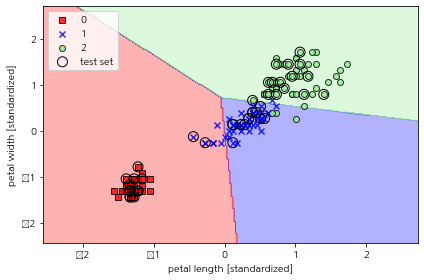

In [21]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx =range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

결과 그래프에서 볼 수 있듯이 세 개의 붓꽃 클래스는 선형 결정 경계로 완벽하게 분류되지 못합니다.

2장에서 이야기 했던 것을 떠올리면 퍼셉트론 알고리즘은 선형적으로 구분되지 않는 데이터셋에는 수렴하지 못함  
-> 실전에서 보통 퍼셉트론을 추전하지 않는 이유  
***다음 절에서 클래스가 선형적으로 완벽하게 구분되지 않더라도 최솟값에 수렴하는 좀더 강력한 선형 분류 모델을 알아보겠습니다***

